In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## load  Boston House dataset

In [4]:
dataset = pd.read_csv("HousingData.csv")

In [5]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Preparing the dataset

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# Sumarizing the stats of the data

In [7]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Check missing values

In [8]:
dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

### filling missing values with mean

In [9]:
n_dataset = dataset.fillna(dataset.median())

In [10]:
n_dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Exploratory data analysis

In [11]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


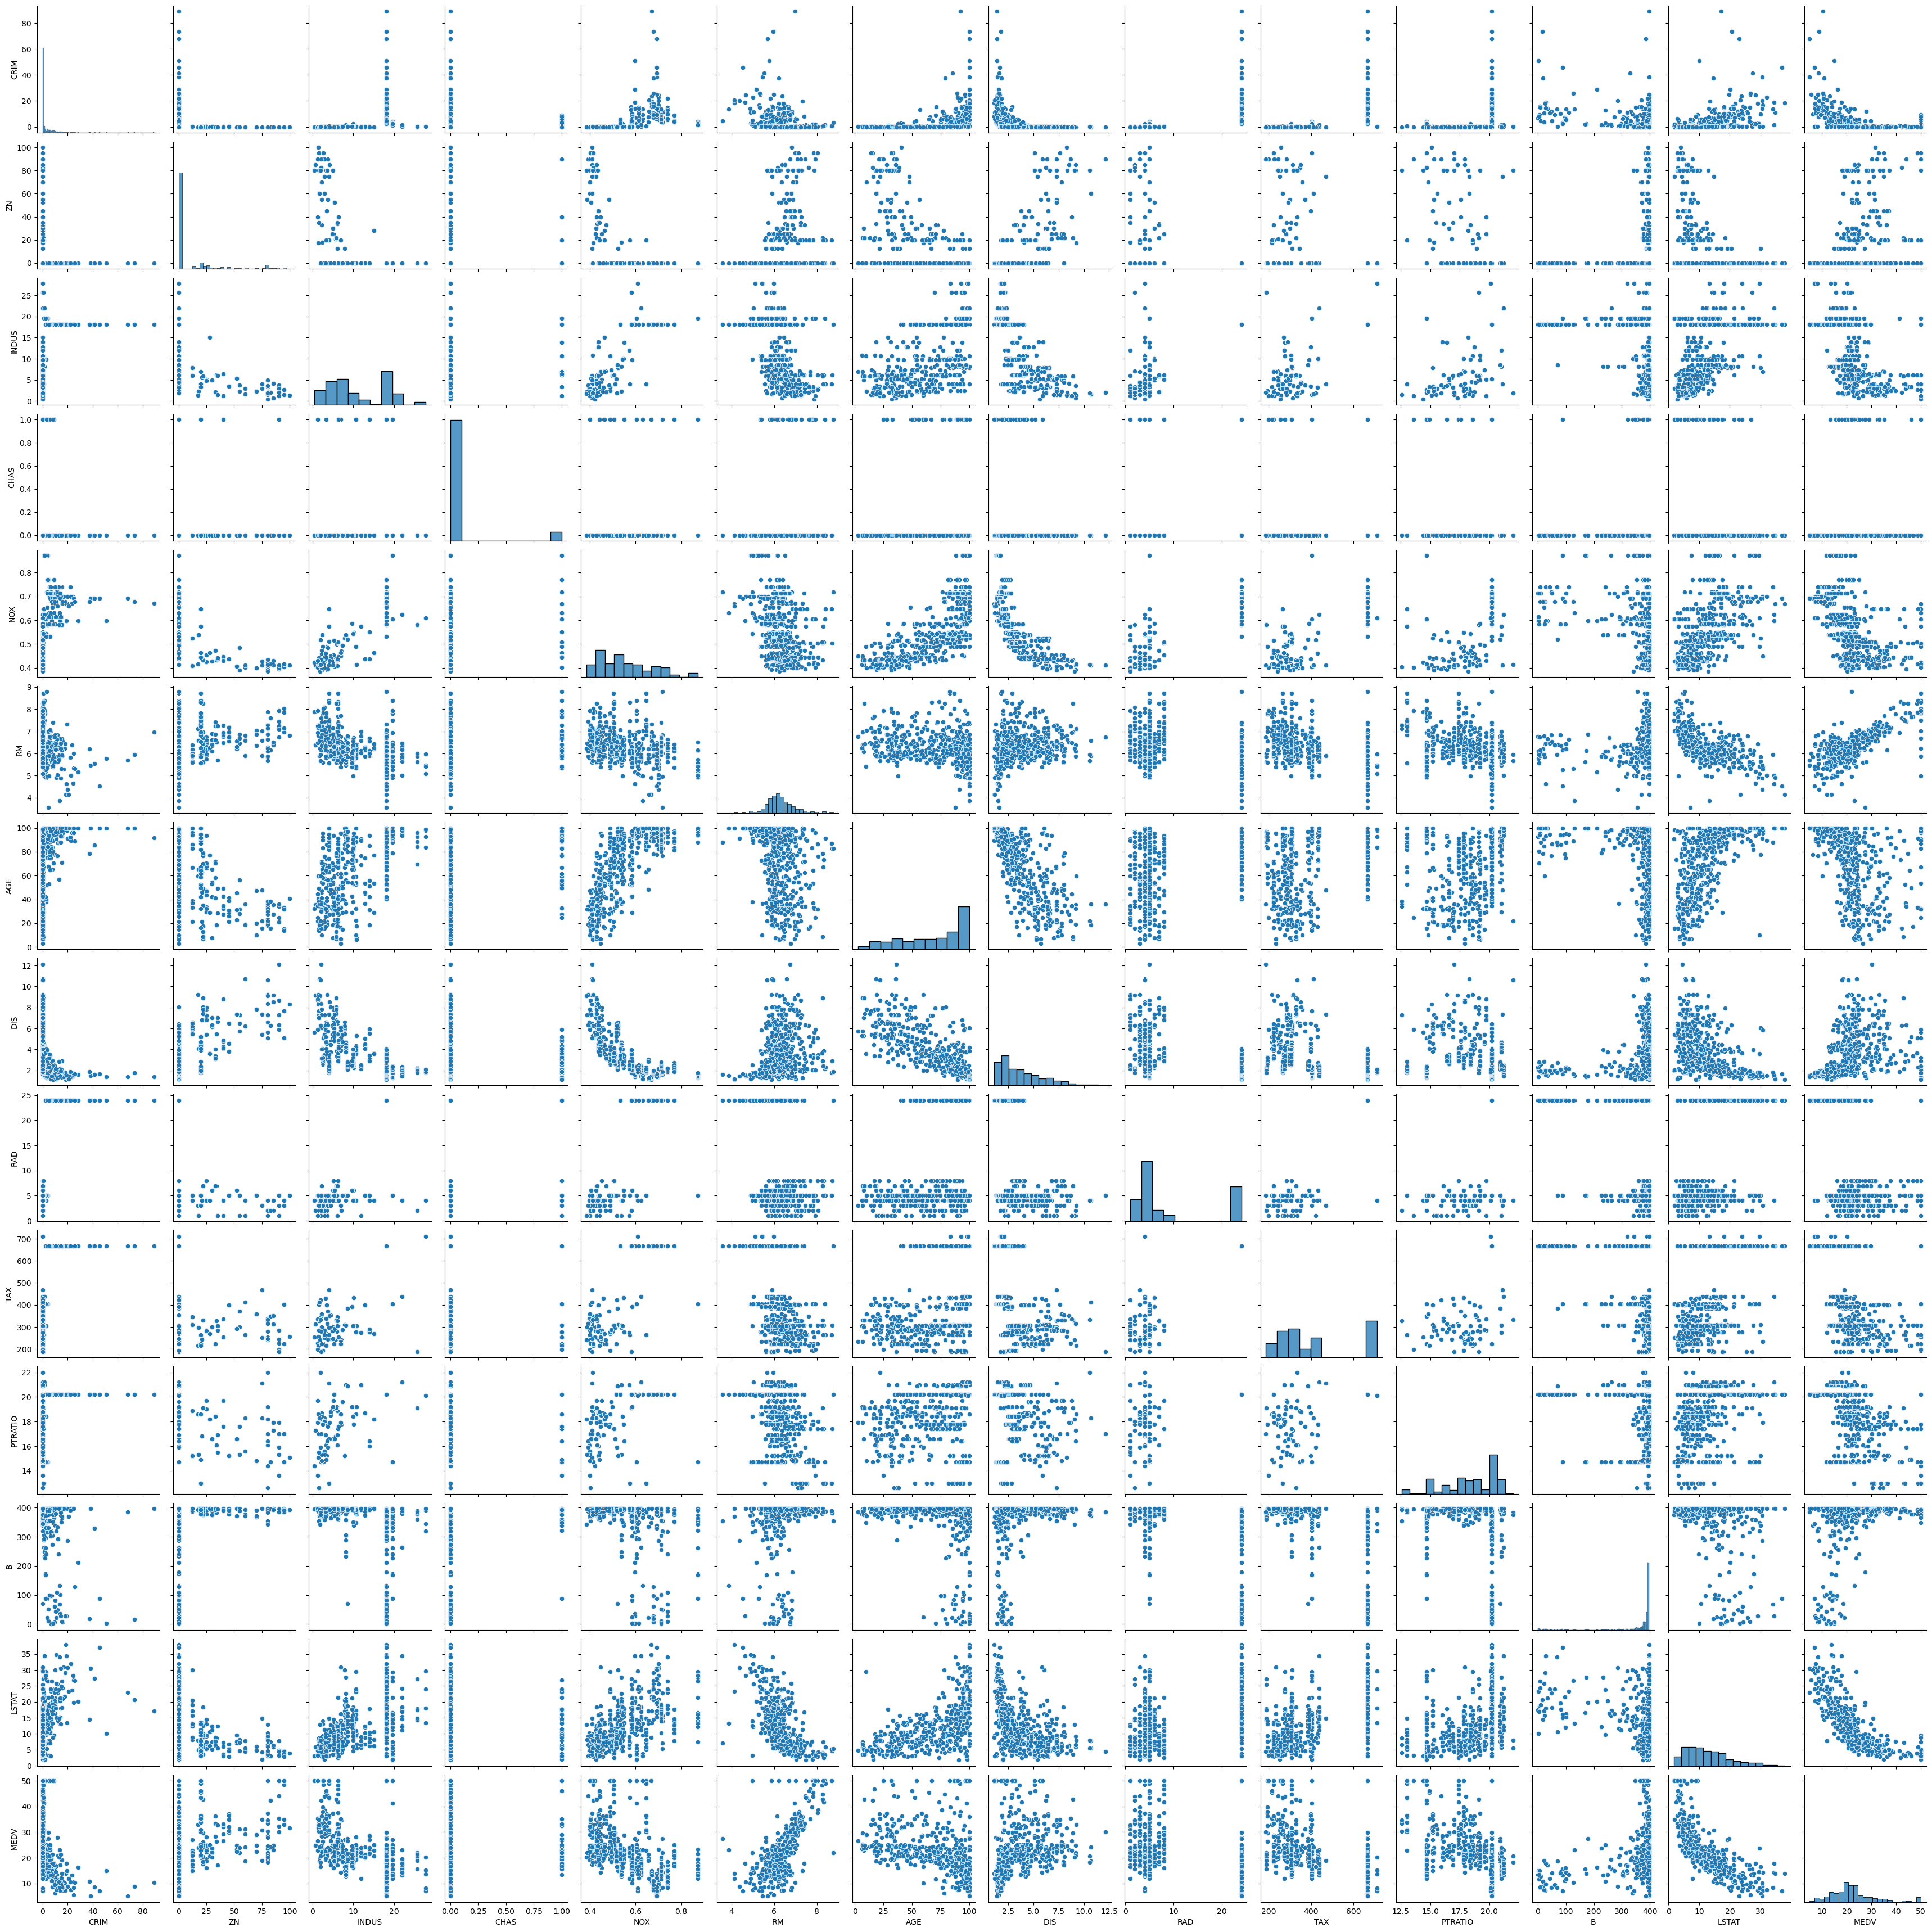

In [12]:
import seaborn as sns
sns.pairplot(dataset)

In [13]:
## Independent and dependent features

X = n_dataset.iloc[:,:-1]
y = n_dataset.iloc[:,-1]

In [14]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43


In [15]:
## Train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [16]:
X_train.shape

(354, 13)

In [17]:
X_test.shape

(152, 13)

In [18]:
# Standardize the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)
X_train.shape

(354, 13)

In [ ]:
X_test = scaler.transform(X_test)
X_test.shape

c:\Users\lenovo\anaconda3\envs\house_py310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(152, 13)

In [42]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [22]:
X_test.shape

(152, 13)

## Model Training 

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
regression = LinearRegression()

In [25]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
print(regression.coef_)

[-1.03139352  0.68235072 -0.05344167  0.95797829 -1.61846531  3.14830411
 -0.65443065 -2.98754714  1.64431524 -1.17863385 -2.00667634  1.00071526
 -3.34283682]


In [27]:
print(regression.intercept_)

23.01581920903955


In [28]:
## Prediction with test data

reg_pred = regression.predict(X_test)

In [29]:
reg_pred

array([ 35.81910399,  59.11420544,  19.8223119 ,  42.72245768,
         9.4340171 ,  41.69564602,  26.43209427,  18.53713727,
        30.39413184,  23.23890142,  42.10079286,  29.02619323,
        -0.59180484,  40.76676739,  30.7749091 ,  25.70500049,
        22.83861738,   1.77567249,  54.63505209,   8.69297941,
        38.12405793,  42.53930902,  24.41094888,  27.5272979 ,
         7.45781235,  19.3200557 ,  39.00001135,  11.76125427,
        47.91688905,  21.5787422 ,  30.30530082,  35.61380916,
        21.37249654,  -2.37311339,  22.59516394, -10.57414542,
        43.67967475,  28.73413885,  48.52117012,  43.4100924 ,
        18.68551641,  42.1288087 ,  56.5653116 ,  39.11028799,
        37.52228184,   7.68849148,  24.92606402,  44.78807616,
        24.1127762 ,  33.2522608 ,  29.56888132,  46.46821844,
        27.47327359,  35.11606469,  36.24748798,  24.4390056 ,
         6.01847926,  48.18463049,  40.69876198,  35.18665527,
        40.05632243,  49.58953023,  37.04501979,  23.93

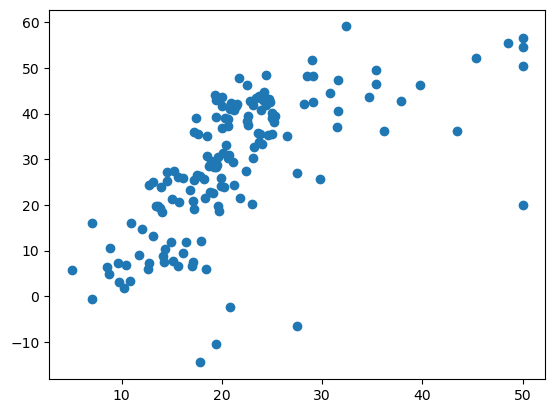

In [30]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)


In [31]:
# residuals
residuals = y_test-reg_pred

In [32]:
residuals

173   -12.219104
274   -26.714205
491    -6.222312
72    -19.922458
452     6.665983
         ...    
441     9.682837
23    -10.802308
225    -0.507130
433     3.951866
447     6.565931
Name: MEDV, Length: 152, dtype: float64

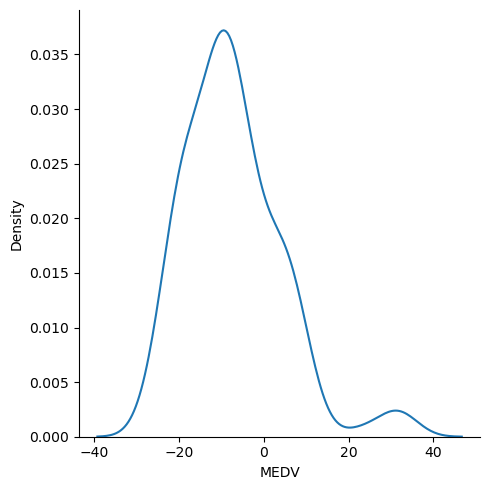

In [33]:
## Plot this residuals

sns.displot(residuals,kind="kde")

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))

11.396132709969587
184.6695235456261


## R square formula 
#### R^2 = 1 - SSR/SST 
#### R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

#### Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)]


In [35]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

-1.4783499080027864


In [36]:
# display adjusted R-squared
1- (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-1.7118176529595708

## New Data Prediction

In [37]:
new_data = X.iloc[0].values.reshape(1, -1)

# Step 1: Transform the new data using your fitted scaler
new_data_scaled = scaler.transform(new_data)

# Step 2: Predict using your trained regression model
predicted_value = regression.predict(new_data_scaled)

print("Predicted value for the first data point:", predicted_value)
print("Actual value:", dataset.iloc[0]["MEDV"])


Predicted value for the first data point: [30.28704199]
Actual value: 24.0


c:\Users\lenovo\anaconda3\envs\house_py310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Pickling the Model file for Deployement

In [38]:
import pickle

In [39]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [40]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [41]:
pickled_model.predict(new_data_scaled)

array([30.28704199])